In [95]:
import sys
sys.path.append('/usr/lib/python3/dist-packages')
import os
import pandas as pd
import datetime
import numpy as np

import json
#import shapefile

#from shapely.geometry  import Point, LineString, Polygon, MultiPolygon

from django.conf import settings
#from sqlalchemy import create_engine
os.environ["DJANGO_SETTINGS_MODULE"] = "mysite.settings"
import django
django.setup()
from tqdm import tqdm_notebook, tqdm
import glob

from django.db.models import Q, Sum, Avg

from pyproj import Proj, transform

PROJ3857  = Proj("+init=EPSG:3857")
PROJ4326 = Proj("+init=EPSG:4326")

In [190]:
df = pd.DataFrame(list(AlcoStopper.objects.all().values()))

In [192]:
df.to_csv('../alco_objects.csv')

In [131]:
df_2 = pd.DataFrame(list(TimePolygons.objects.all().values()))

In [132]:
df_2['geojson'] = df_2['geojson_smoothed']

In [133]:
df_2 = df_2[(df_2['cafe'] == False) & (~df_2['geojson'].isna())]

In [134]:
df_2['geometry'] = df_2['geojson'].str.replace("'", '"').apply(lambda r: shape(geojson.loads(r)))

In [135]:
df_2 = gpd.GeoDataFrame(df_2)

In [136]:
len(df_2)

9572

In [137]:
754

754

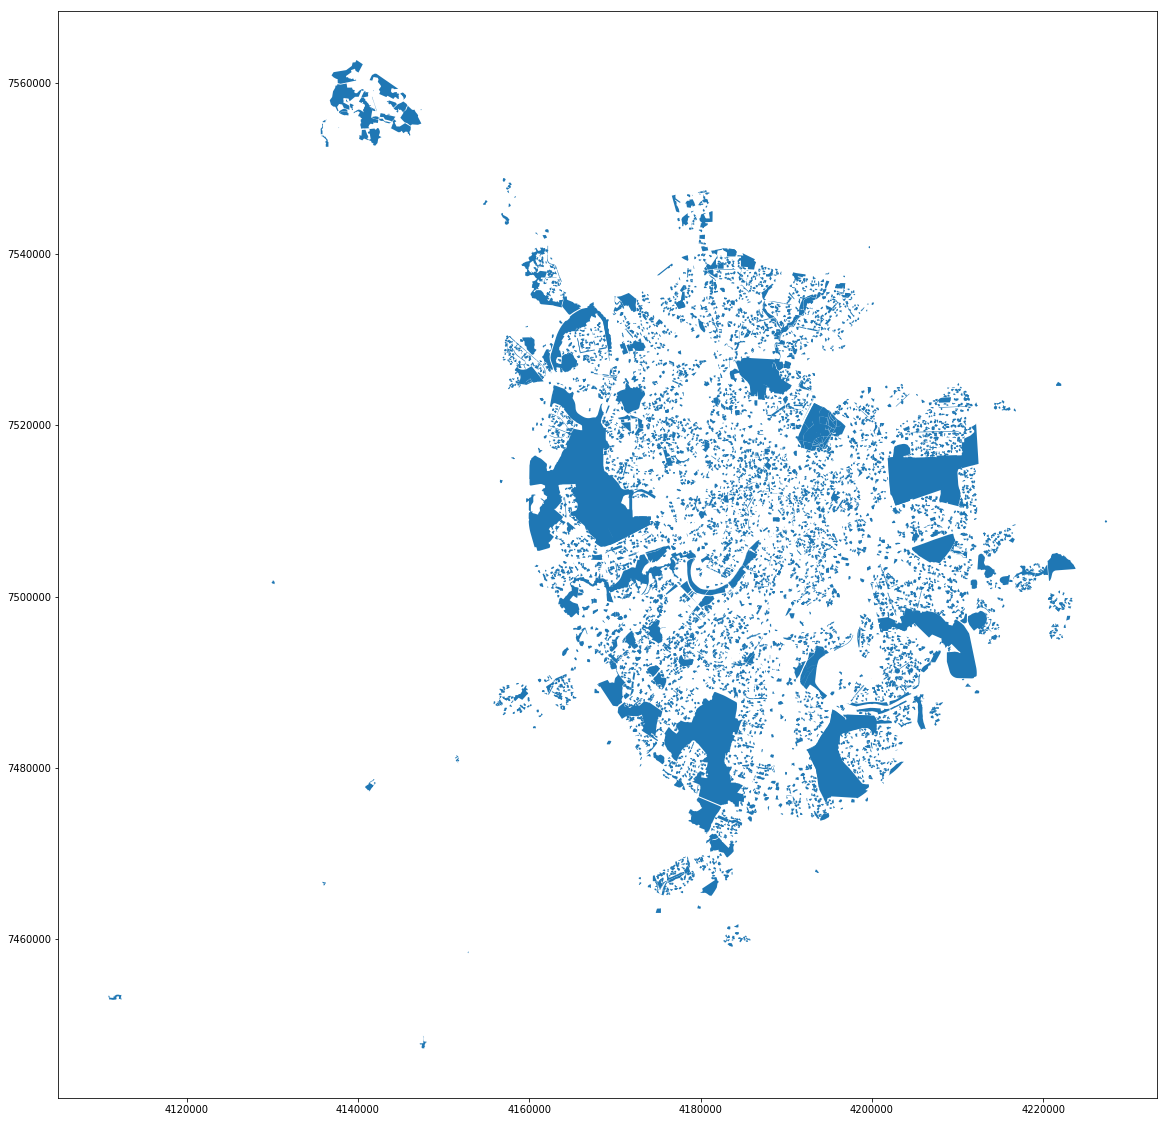

In [138]:
df_2.plot(figsize=(30, 20))

In [41]:
df_2[df_2['cafe'] == 1].to_csv('../polygons.csv')

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
from main_map.models import OrganizationNatClass, TimeSquare, AlcoStopper, TimePolygons, TimePolygonsUnion
import itertools

In [7]:
df = pd.read_csv('../parks.csv')

In [8]:
import geopandas as gpd

In [47]:
coord = [ 4154490.117861112, 7509589.944255845 ]

In [49]:
transform(PROJ3857, PROJ4326, coord[0], coord[1])

(37.32041970598149, 55.75395387598931)

In [9]:
import geojson
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon
from shapely.geometry import shape

In [10]:
df['geometry'] = df['geoData'].str.replace("'", '"').apply(lambda r: shape(geojson.loads(r)))

In [11]:
df = gpd.GeoDataFrame(df)

In [24]:
df_2 = pd.DataFrame(list(TimePolygonsUnion.objects.all().values()))

In [25]:
df_2

,alco_stopper_id,cafe,geojson,geojson_smoothed,id,time,x,y
0,-2,False,None,"{""type"": ""Polygon"", ""coordinates"": [[[4183615....",1,None,4.183486e+06,7.459343e+06
1,-2,False,None,"{""type"": ""Polygon"", ""coordinates"": [[[4185285....",2,None,4.185418e+06,7.459783e+06
2,-2,False,None,"{""type"": ""Polygon"", ""coordinates"": [[[4183635....",3,None,4.183725e+06,7.459905e+06
3,-2,False,None,"{""type"": ""Polygon"", ""coordinates"": [[[4183095....",4,None,4.183256e+06,7.461318e+06
4,-2,False,None,"{""type"": ""Polygon"", ""coordinates"": [[[4183945....",5,None,4.184177e+06,7.461531e+06
5,-2,False,None,"{""type"": ""Polygon"", ""coordinates"": [[[4174775....",6,None,4.174959e+06,7.463390e+06
6,-2,False,None,"{""type"": ""Polygon"", ""coordinates"": [[[4179625....",7,None,4.179819e+06,7.463725e+06
7,-2,False,None,"{""type"": ""Polygon"", ""coordinates"": [[[4184015....",8,None,4.184252e+06,7.460701e+06
8,-2,False,None,"{""type"": ""Polygon"", ""coordinates"": [[[4182655....",9,None,4.183032e+06,7.459856e+06
9,-2,False,None,"{""type"": ""Polygon"", ""coordinates"": [[[4184535....",10,None,4.184653e+06,7.459960e+06


In [139]:
df_2 = df_2[~df_2['geojson_smoothed'].isna()]

In [140]:
len(df_2)

9572

In [141]:
# df_2 = df_2[df_2['alco_stopper_id'] != -1]

In [142]:
df_2['geometry'] = df_2['geojson_smoothed'].apply(lambda r: shape(geojson.loads(r)))

In [147]:
df_2 = df_2[~df_2['geometry'].isna()]

In [183]:
polygons = df_2['geometry'].tolist()[6000:-30]

In [184]:
from shapely.ops import cascaded_union
boundary = gpd.GeoSeries(cascaded_union(polygons))

In [189]:
len(TimePolygonsUnion.objects.all())

5980

In [178]:
TimePolygonsUnion.objects.all().delete()

(4557, {'main_map.TimePolygonsUnion': 4557})

In [186]:
def geom_to_coords(geom):
    a = np.array(geom.exterior.coords.xy).T
#     coords = list(map(lambda coord: list(transform(PROJ4326, PROJ3857, coord[0], coord[1])), a))
    return a

In [187]:
from tqdm import tqdm

In [188]:
for g in tqdm(boundary):
    if type(g) == MultiPolygon:
        for i in g:
            geom = geom_to_coords(i)
            x, y = np.array(geom).mean(axis=0)
            obj = TimePolygonsUnion(x=x, y=y, geojson_smoothed=geojson.dumps(Polygon(geom)), 
                               cafe=0, alco_stopper_id=-2)
            obj.save()
    else:
        geom = geom_to_coords(g)
        x, y = np.array(geom).mean(axis=0)
        obj = TimePolygonsUnion(x=x, y=y, geojson_smoothed=geojson.dumps(Polygon(geom)), 
                           cafe=0, alco_stopper_id=-2)
        obj.save()

100%|██████████| 1/1 [00:12<00:00, 12.94s/it]


In [ ]:
for ind, row in df.iterrows():
    print(ind)
    g = row['geometry']
    if type(g) == MultiPolygon:
        for i in g:
            geom = geom_to_coords(i)
            x, y = np.array(geom).mean(axis=0)
            obj = TimePolygons(x=x, y=y, geojson_smoothed=geojson.dumps(Polygon(geom)), 
                               cafe=0, alco_stopper_id=-1)
            obj.save()

In [72]:

polygons = df_2['geometry'].tolist()

boundary.plot(color = 'red')

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 4184711.3077976503 7492267.2279001065 at 4184711.3077976503 7492267.2279001065


ValueError: No Shapely geometry can be created from null value

In [56]:
# TimePolygons.objects.filter(alco_stopper_id=-1).delete()

In [ ]:
df_2

In [61]:
df_2[~df_2['alco_stopper_id'].isna()] [['alco_stopper_id', 'geojson_smoothed']].to_csv('../polygons.csv')

In [49]:
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon


In [50]:
from shapely.geometry import shape

In [52]:
PROJ3857  = Proj("+init=EPSG:3857")
PROJ4326 = Proj("+init=EPSG:4326")

In [53]:
def geom_to_coords(geom):
    a = np.array(geom.exterior.coords.xy).T
    coords = list(map(lambda coord: list(transform(PROJ4326, PROJ3857, coord[0], coord[1])), a))
    return coords

In [54]:
for ind, row in df.iterrows():
    print(ind)
    g = row['geometry']
    if type(g) == MultiPolygon:
        for i in g:
            geom = geom_to_coords(i)
            x, y = np.array(geom).mean(axis=0)
            obj = TimePolygons(x=x, y=y, geojson_smoothed=geojson.dumps(Polygon(geom)), 
                               cafe=0, alco_stopper_id=-1)
            obj.save()
    else:
        geom = geom_to_coords(g)
        x, y = np.array(geom).mean(axis=0)
        obj = TimePolygons(x=x, y=y, geojson_smoothed=geojson.dumps(Polygon(geom)), 
                           cafe=0, alco_stopper_id=-1)
        obj.save()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

array([4174978.43468933, 7508481.27192004])

In [65]:
[ [float(j) for j in i.split(' ') if j!=''] for i in str(a.values[1])[10:-3].split(',')]

ValueError: could not convert string to float: '55.74695615645199)'